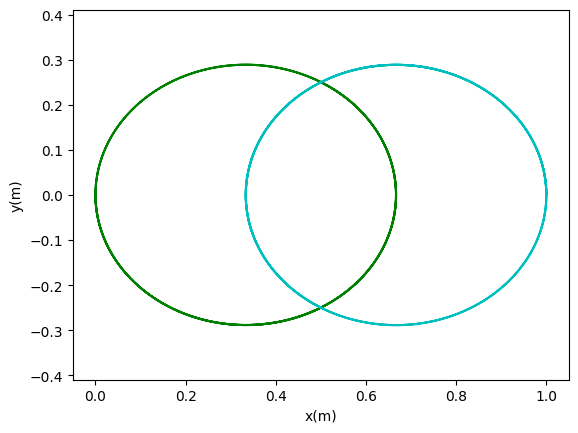

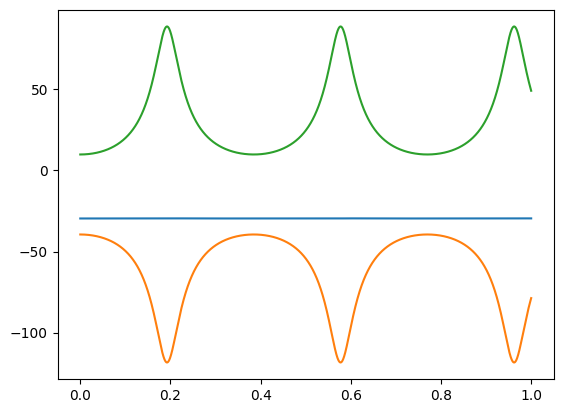

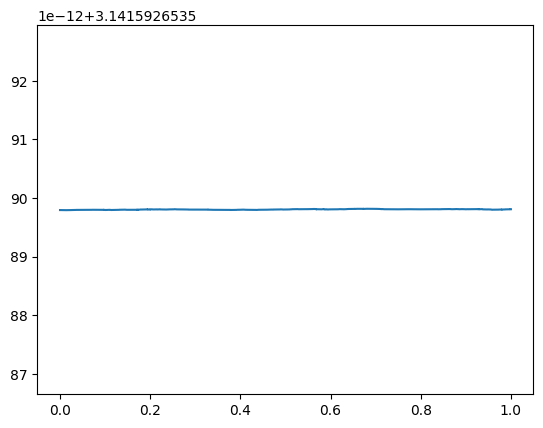

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np 


#Constants:

G = 4*np.pi**2 #4np.pi

#Time is measured in years
#Distance is Measured in AU
#Mass is measured in MSun

#G = 240.25824 # Gravitational Constant mm^3/(kg min^2)
#AU = 1000 # Distance between Star 1 & Star 2 
#sec = 24.0*60*60 #seconds in a day 


#grav = G*M1*M2

def Evolve(Particle,dt):
    
    Particle["Velocity"][0] += Particle["Acceleration"][0]*dt
    Particle["Velocity"][1] += Particle["Acceleration"][1]*dt
    Particle["Velocity"][2] += Particle["Acceleration"][2]*dt
            
    Particle["Position"][0] += Particle["Velocity"][0]*dt
    Particle["Position"][1] += Particle["Velocity"][1]*dt
    Particle["Position"][2] += Particle["Velocity"][2]*dt

    Particle["Trajectory"][0].append(Particle["Position"][0])
    Particle["Trajectory"][1].append(Particle["Position"][1])
    Particle["Trajectory"][2].append(Particle["Position"][2])
    

def gravity_simulate(particles,time,steps):

    #Initial Conditions: 
    t = 0.0
    dt = float(time)/steps 
    e = 0
    
    Energy    = []
    Potential = []
    Kinetic   = []
    Time      = []
    Lz        = []

    def force(rx, ry, rz):
        return -1/(rx**2+ry**2+rz**2)
    
    while t < time: 
        t += dt
        k  = 0
        u  = 0
        lz = 0
        
        # Interactions
        
        for i, Particle1 in enumerate(particles):
            
            Particle1["Acceleration"][0] = 0
            Particle1["Acceleration"][1] = 0
            Particle1["Acceleration"][2] = 0
            
            k += (1./2)*Particle1["Mass"]*Particle1["Velocity"][0]**2
            k += (1./2)*Particle1["Mass"]*Particle1["Velocity"][1]**2
            k += (1./2)*Particle1["Mass"]*Particle1["Velocity"][2]**2
            
            lz += Particle1["Mass"]*(Particle1["Position"][0]*Particle1["Velocity"][1] - Particle1["Position"][1]*Particle1["Velocity"][0])
            
            for j, Particle2 in enumerate(particles):
                if i == j: continue
                g = G*Particle1["Mass"]*Particle2["Mass"]
                
                rx = Particle2["Position"][0] - Particle1["Position"][0] 
                ry = Particle2["Position"][1] - Particle1["Position"][1]
                rz = Particle2["Position"][2] - Particle1["Position"][2] 
                
                r3 = pow(rx**2+ry**2+rz**2,1.5)
                
                Particle1["Acceleration"][0] += g*rx/r3/Particle1["Mass"]
                Particle1["Acceleration"][1] += g*ry/r3/Particle1["Mass"]
                Particle1["Acceleration"][2] += g*rz/r3/Particle1["Mass"]
                
                u += -g/(2*np.sqrt(rx**2+ry**2+rz**2))
           
        # Time Evolution
        
        for Particle in particles:
            Evolve(Particle,dt)
        
        Energy.append(u+k)
        Kinetic.append(k)
        Potential.append(u)
        Time.append(t)
        Lz.append(lz)
        
    return Time, Potential, Kinetic, Energy, Lz

particles = []
particle1 = {"Name":"Star1","Mass":1,"Position":[0.0, 0.0, 0.0],"Velocity":[0.0, -np.pi, 0.0],"Acceleration":[0,0,0],"Trajectory":[[],[],[]]}
particle2 = {"Name":"Star2","Mass":1,"Position":[1.0, 0.0, 0.0],"Velocity":[0.0, np.pi, 0.0],"Acceleration":[0,0,0],"Trajectory":[[],[],[]]}
#particle3 = {"Name":"Planet1","Mass":1e-4,"Position":[-90.0, 0.0, 0.0],"Velocity":[0.0, 1.5, 0.0],"Trajectory":[[],[],[]]}

particles = [particle1,particle2] #particle3

Time, Potential, Kinetic, Energy, Lz = gravity_simulate(particles,1,10000)
        
#Plot the results 
plt.plot(particles[0]["Trajectory"][0], particles[0]["Trajectory"][1], "-g")
plt.plot(particles[1]["Trajectory"][0], particles[1]["Trajectory"][1], "-c")
#plt.plot(particles[2]["Trajectory"][0], particles[2]["Trajectory"][1], "-k")

plt.axis("equal")
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.show()

plt.clf()
plt.plot(Time,Energy)
plt.plot(Time,Potential)
plt.plot(Time,Kinetic)
plt.show()
plt.clf()
plt.plot(Time,Lz)
plt.show()
plt.savefig("Trajectory.png")
